In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the Excel file
df = pd.read_excel('Cutlass_time_entry.xlsx')

# Display basic info about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nUnique values in key columns:")
if 'WO Type' in df.columns:
    print(f"WO Type values: {df['WO Type'].unique()}")
if 'Time Type' in df.columns:
    print(f"Time Type values: {df['Time Type'].unique()}")
if 'Warranty Claim?' in df.columns:
    print(f"Warranty Claim values: {df['Warranty Claim?'].unique()}")

Dataset shape: (5033, 23)

Column names:
['Work Order', 'Asset Description', 'Description', 'Completion Notes', 'Regular Hours', 'Overtime Hours', 'Total Labor Hours', 'Status', 'Work Date', 'WO Type', 'Time Type', 'Warranty Claim?', 'Claim Number', 'Claim Status', 'User Resource: Full Name', 'Contractor Name', 'Plant', 'Year', 'Month', 'Week', 'Site ', 'Category', 'Month Year']

First few rows:
   Work Order Asset Description                        Description  \
0  WO-1052677               D02  Cutlass 2 - Weekly MET station PM   
1  WO-1052677               D02  Cutlass 2 - Weekly MET station PM   
2  WO-1052499               D02  Cutlass 2 - Weekly MET station PM   
3  WO-1052499               D02  Cutlass 2 - Weekly MET station PM   
4  WO-1052235               D02  Cutlass 2 - Weekly MET station PM   

                                    Completion Notes  Regular Hours  \
0  Cause: Origis was assigned to conduct weekly i...            1.0   
1  Cause: Origis was assigned to condu

In [5]:
# Filter data to keep only Corrective, Project, Ad Hoc work orders
print("Original dataset shape:", df.shape)
print("Original WO Type distribution:")
print(df['WO Type'].value_counts())

# Filter the data
filtered_df = df[df['WO Type'].isin(['Corrective', 'Project', 'Ad Hoc'])].copy()

print("\nFiltered dataset shape:", filtered_df.shape)
print("Filtered WO Type distribution:")
print(filtered_df['WO Type'].value_counts())

# Show what was removed
removed_count = len(df) - len(filtered_df)
print(f"\nRemoved {removed_count} rows with WO Type = 'Preventive' or Others irrelevant to the analysis")

Original dataset shape: (5033, 23)
Original WO Type distribution:
WO Type
Corrective    1732
Ad Hoc        1595
Preventive    1189
Project        517
Name: count, dtype: int64

Filtered dataset shape: (3844, 23)
Filtered WO Type distribution:
WO Type
Corrective    1732
Ad Hoc        1595
Project        517
Name: count, dtype: int64

Removed 1189 rows with WO Type = 'Preventive' or Others irrelevant to the analysis


In [10]:
# Check for duplicates
print("Checking for duplicates...")
print(f"Total rows before duplicate check: {len(filtered_df)}")

# Check for exact duplicates
exact_duplicates = filtered_df.duplicated().sum()
print(f"Exact duplicate rows: {exact_duplicates}")

if exact_duplicates > 0:
    print("\nShowing duplicate rows:")
    duplicate_rows = filtered_df[filtered_df.duplicated(keep=False)]
    print(duplicate_rows)
    
    # Remove exact duplicates
    filtered_df = filtered_df.drop_duplicates()
    print(f"\nAfter removing exact duplicates: {len(filtered_df)} rows")

# Check for duplicates based on key columns (if they exist)
key_columns = []
for col in ['Work Order','Work Date','Completion Notes','WO Type','Time Type', 'User Resource: Full Name']:
    if col in filtered_df.columns:
        key_columns.append(col)

if key_columns:
    key_duplicates = filtered_df.duplicated(subset=key_columns).sum()
    print(f"Duplicates based on key columns {key_columns}: {key_duplicates}")
    
    if key_duplicates > 0:
        print("\nShowing key column duplicates:")
        key_duplicate_rows = filtered_df[filtered_df.duplicated(subset=key_columns, keep=False)]
        print(key_duplicate_rows[key_columns + ['WO Type']])
        
        # Optionally remove key duplicates (uncomment if needed)
        # filtered_df = filtered_df.drop_duplicates(subset=key_columns)
        # print(f"After removing key duplicates: {len(filtered_df)} rows")

print(f"\nFinal dataset shape: {filtered_df.shape}")

Checking for duplicates...
Total rows before duplicate check: 3701
Exact duplicate rows: 0
Duplicates based on key columns ['Work Order', 'Work Date', 'Completion Notes', 'WO Type', 'Time Type', 'User Resource: Full Name']: 473

Showing key column duplicates:
      Work Order   Work Date  \
464   WO-1057205  10/23/2024   
465   WO-1057205  10/23/2024   
475   WO-1052386   6/12/2024   
478   WO-1052386   6/12/2024   
848   WO-1054497   8/22/2024   
...          ...         ...   
5012  WO-1068380   6/16/2025   
5015  WO-1068380   6/17/2025   
5016  WO-1068380   6/17/2025   
5018  WO-1068380   6/20/2025   
5019  WO-1068380   6/20/2025   

                                       Completion Notes     WO Type Time Type  \
464   Origis Tech supported SOLV during the outage b...     Project      Work   
465   Origis Tech supported SOLV during the outage b...     Project      Work   
475   Bechtel and Origis AROC worked together with T...  Corrective  Training   
478   Bechtel and Origis AROC w

Available date columns: []


<Figure size 1400x800 with 0 Axes>

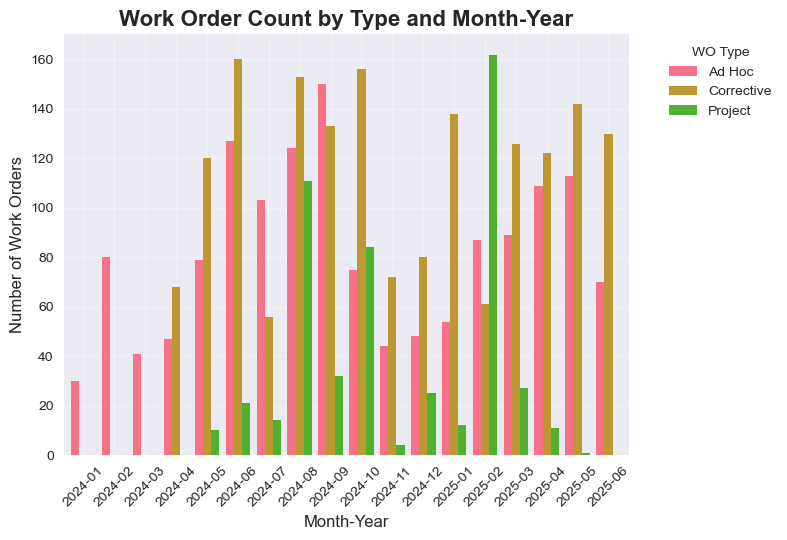


Monthly summary:
WO Type     Ad Hoc  Corrective  Project
Month_Year                             
2024-01         30           0        0
2024-02         80           0        0
2024-03         41           0        0
2024-04         47          68        0
2024-05         79         120       10
2024-06        127         160       21
2024-07        103          56       14
2024-08        124         153      111
2024-09        150         133       32
2024-10         75         156       84
2024-11         44          72        4
2024-12         48          80       25
2025-01         54         138       12
2025-02         87          61      162
2025-03         89         126       27
2025-04        109         122       11
2025-05        113         142        1
2025-06         70         130        0

Total work orders by type:
WO Type
Ad Hoc        1470
Corrective    1717
Project        514
dtype: int64


In [12]:
# Prepare data for monthly analysis
# Assuming there's a date column - adjust column name as needed
date_columns = [col for col in filtered_df.columns if 'Work Date' in col.lower()]
print("Available date columns:", date_columns)

# Use the most appropriate date column (adjust as needed)
date_col = 'Work Date'  

if date_col in filtered_df.columns:
    # Convert to datetime
    filtered_df[date_col] = pd.to_datetime(filtered_df[date_col])
    
    # Create Month-Year column
    filtered_df['Month_Year'] = filtered_df[date_col].dt.to_period('M')
    
    # Create pivot table for plotting
    monthly_counts = filtered_df.groupby(['Month_Year', 'WO Type']).size().unstack(fill_value=0)
    
    # Plot histogram
    plt.figure(figsize=(14, 8))
    monthly_counts.plot(kind='bar', stacked=False, width=0.8)
    plt.title('Work Order Count by Type and Month-Year', fontsize=16, fontweight='bold')
    plt.xlabel('Month-Year', fontsize=12)
    plt.ylabel('Number of Work Orders', fontsize=12)
    plt.legend(title='WO Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Show summary statistics
    print("\nMonthly summary:")
    print(monthly_counts)
    print(f"\nTotal work orders by type:")
    print(monthly_counts.sum())
else:
    print(f"Date column '{date_col}' not found. Available columns: {filtered_df.columns.tolist()}")

Records with Time Type in ['Work', 'Training', 'Warranty Support'] and Warranty Claim = True:
Total records: 1075

Breakdown by Time Type:
Time Type
Work                711
Warranty Support    338
Training             26
Name: count, dtype: int64


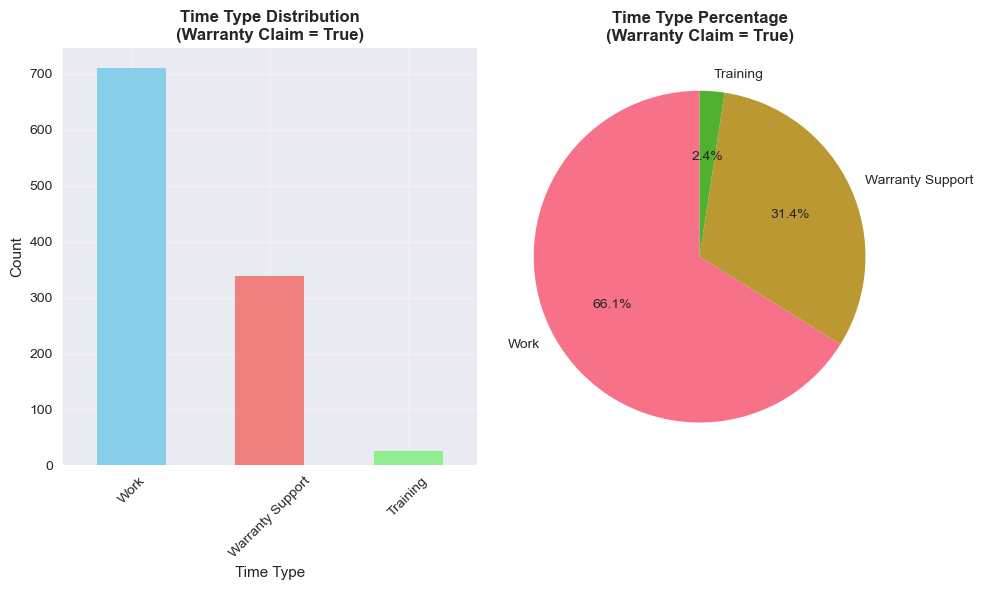


Cross-tabulation of WO Type vs Time Type (Warranty Claim = True):
Time Type   Training  Warranty Support  Work
WO Type                                     
Corrective        25               314   504
Project            1                24   207


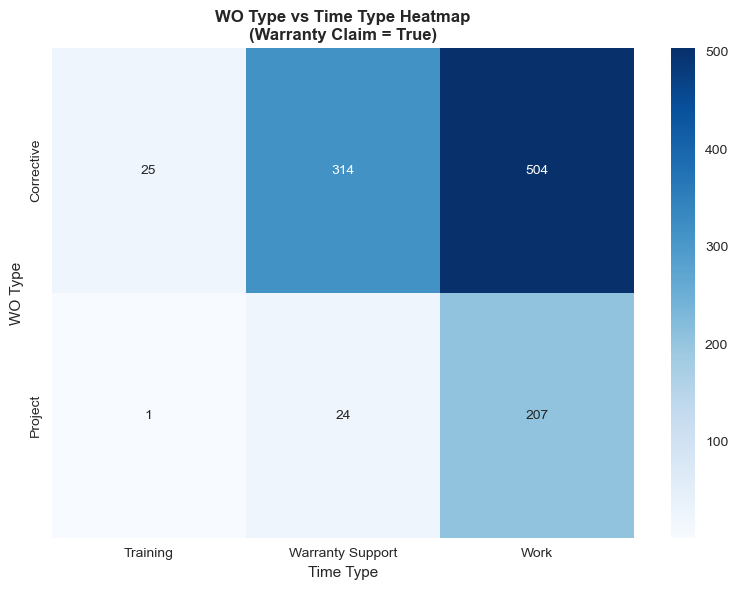

In [13]:
# Filter for specific Time Types and Warranty Claim = True
time_types_of_interest = ['Work', 'Training', 'Warranty Support']
warranty_true_data = filtered_df[
    (filtered_df['Time Type'].isin(time_types_of_interest)) & 
    (filtered_df['Warranty Claim?'] == True)
].copy()

print(f"Records with Time Type in {time_types_of_interest} and Warranty Claim = True:")
print(f"Total records: {len(warranty_true_data)}")

if len(warranty_true_data) > 0:
    # Count by Time Type
    time_type_counts = warranty_true_data['Time Type'].value_counts()
    print("\nBreakdown by Time Type:")
    print(time_type_counts)
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    
    # Bar plot
    plt.subplot(1, 2, 1)
    time_type_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title('Time Type Distribution\n(Warranty Claim = True)', fontweight='bold')
    plt.xlabel('Time Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(time_type_counts.values, labels=time_type_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Time Type Percentage\n(Warranty Claim = True)', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional analysis by WO Type
    if len(warranty_true_data) > 0:
        cross_tab = pd.crosstab(warranty_true_data['WO Type'], warranty_true_data['Time Type'])
        print("\nCross-tabulation of WO Type vs Time Type (Warranty Claim = True):")
        print(cross_tab)
        
        # Heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
        plt.title('WO Type vs Time Type Heatmap\n(Warranty Claim = True)', fontweight='bold')
        plt.tight_layout()
        plt.show()
else:
    print("No records found matching the criteria.")

Records with Time Type = 'Warranty Support' and Warranty Claim = False:
Total records: 121

Sample records:
         WO Type         Time Type  Warranty Claim?
484   Corrective  Warranty Support            False
485   Corrective  Warranty Support            False
561   Corrective  Warranty Support            False
852   Corrective  Warranty Support            False
894   Corrective  Warranty Support            False
895   Corrective  Warranty Support            False
947   Corrective  Warranty Support            False
977   Corrective  Warranty Support            False
1001     Project  Warranty Support            False
1017  Corrective  Warranty Support            False

Distribution by WO Type:
WO Type
Corrective    109
Project         7
Ad Hoc          5
Name: count, dtype: int64


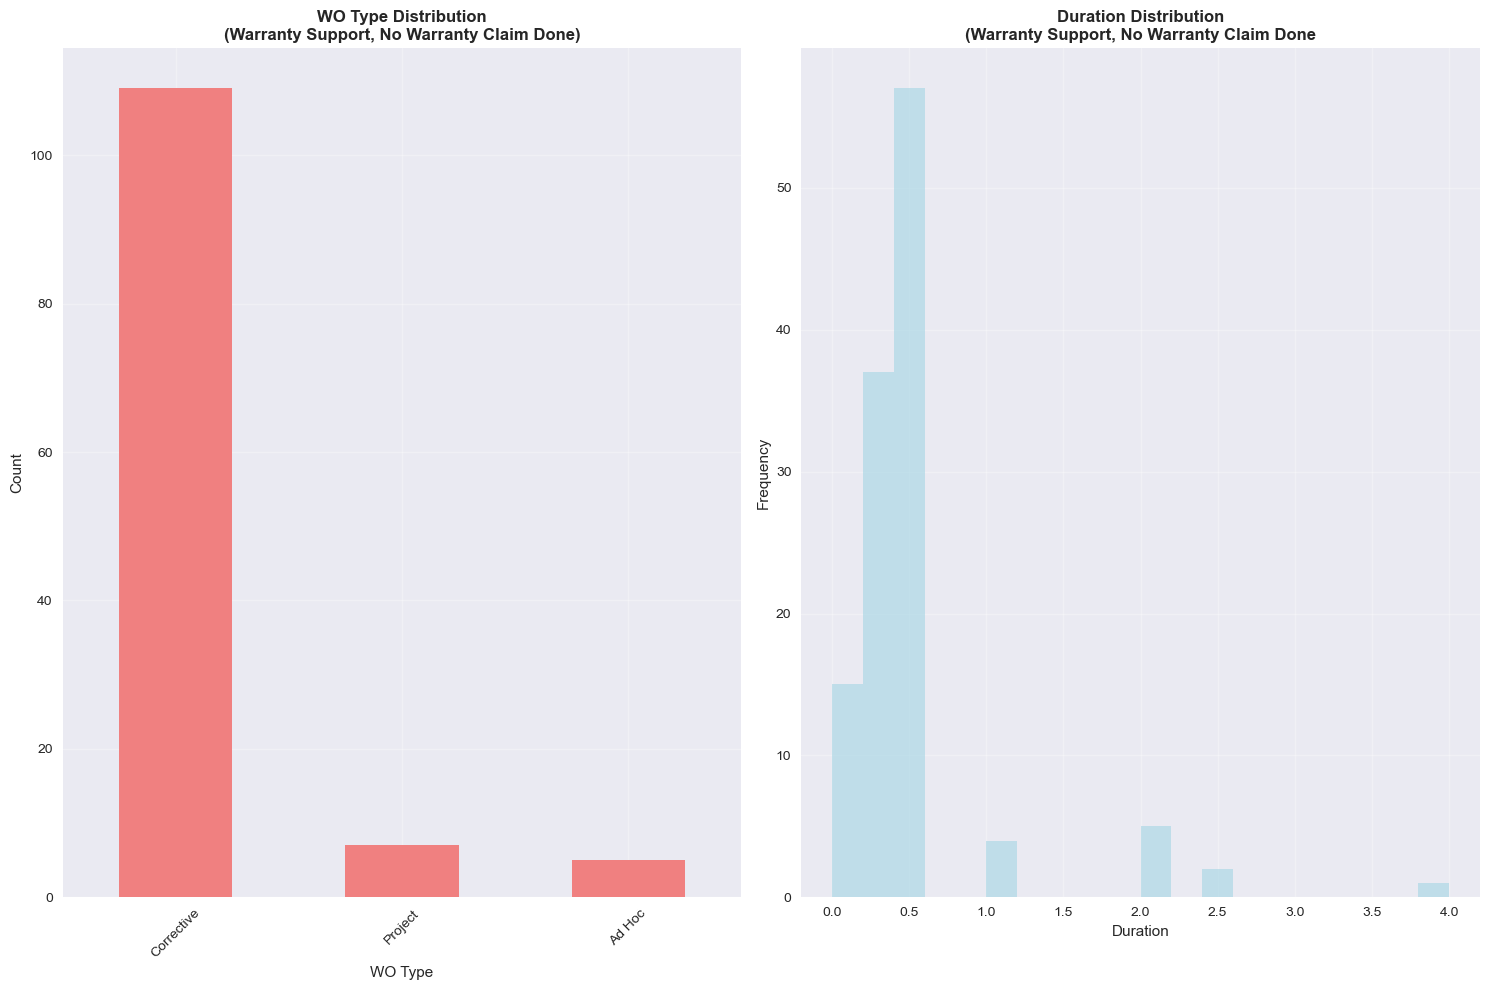


Key insights:
- Total Warranty Support work without warranty claims: 121
- Most common WO Type: Corrective (109 occurrences)
- Second most common WO Type: Project (7 occurrences)


In [20]:
# Filter for Time Type = Warranty Support and Warranty Claim = False
warranty_support_false = filtered_df[
    (filtered_df['Time Type'] == 'Warranty Support') & 
    (filtered_df['Warranty Claim?'] == False)
].copy()

print("Records with Time Type = 'Warranty Support' and Warranty Claim = False:")
print(f"Total records: {len(warranty_support_false)}")

if len(warranty_support_false) > 0:
    print("\nSample records:")
    print(warranty_support_false[['WO Type', 'Time Type', 'Warranty Claim?']].head(10))
    
    # Analyze by WO Type
    wo_type_dist = warranty_support_false['WO Type'].value_counts()
    print(f"\nDistribution by WO Type:")
    print(wo_type_dist)
    
    # Create visualization
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 10))
    
    # Bar chart of WO Type distribution
    wo_type_dist.plot(kind='bar', ax=ax1, color='lightcoral')
    ax1.set_title('WO Type Distribution\n(Warranty Support, No Warranty Claim Done)', fontweight='bold')
    ax1.set_xlabel('WO Type')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3)
    
    
    # Duration analysis if duration column exists
    duration_cols = [col for col in warranty_support_false.columns if 'duration' in col.lower() or 'hours' in col.lower()]
    if duration_cols:
        duration_col = duration_cols[0]
        warranty_support_false[duration_col].hist(bins=20, ax=ax2, color='lightblue', alpha=0.7)
        ax2.set_title(f'Duration Distribution\n(Warranty Support, No Warranty Claim Done', fontweight='bold')
        ax2.set_xlabel('Duration')
        ax2.set_ylabel('Frequency')
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No duration column available\nfor analysis', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=12)
        ax2.set_title('Duration Analysis (N/A)', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\nKey insights:")
    print(f"- Total Warranty Support work without warranty claims: {len(warranty_support_false)}")
    print(f"- Most common WO Type: {wo_type_dist.index[0]} ({wo_type_dist.iloc[0]} occurrences)")
    if len(wo_type_dist) > 1:
        print(f"- Second most common WO Type: {wo_type_dist.index[1]} ({wo_type_dist.iloc[1]} occurrences)")
    
else:
    print("No records found with Time Type = 'Warranty Support' and Warranty Claim = False")
    
    # Show what Warranty Support records do exist
    warranty_support_all = filtered_df[filtered_df['Time Type'] == 'Warranty Support']
    print(f"\nTotal Warranty Support records: {len(warranty_support_all)}")
    if len(warranty_support_all) > 0:
        print("Warranty Claim distribution for Warranty Support:")
        print(warranty_support_all['Warranty Claim?'].value_counts())

In [27]:
# Summary dashboard of all analyses
print("="*60)
print("CUTLASS TIME ENTRY ANALYSIS SUMMARY")
print("="*60)

print(f"\n1. DATA OVERVIEW:")
print(f"   - Original dataset: {len(df)} records")
print(f"   - After filtering (Corrective/Project/Ad Hoc): {len(filtered_df)} records")
print(f"   - Removed records: {len(df) - len(filtered_df)}")

print(f"\n2. WORK ORDER TYPE DISTRIBUTION:")
wo_dist = filtered_df['WO Type'].value_counts()
for wo_type, count in wo_dist.items():
    percentage = (count / len(filtered_df)) * 100
    print(f"   - {wo_type}: {count} ({percentage:.1f}%)")

print(f"\n3. TIME TYPE ANALYSIS:")
time_dist = filtered_df['Time Type'].value_counts()
for time_type, count in time_dist.items():
    percentage = (count / len(filtered_df)) * 100
    print(f"   - {time_type}: {count} ({percentage:.1f}%)")

print(f"\n4. WARRANTY CLAIM ANALYSIS:")
work_warranty_dist = filtered_df[filtered_df['Time Type'] == 'Work']['Warranty Claim?'].value_counts()
warranty_support_warranty_dist = filtered_df[filtered_df['Time Type'] == 'Warranty Support']['Warranty Claim?'].value_counts()
warranty_dist = pd.concat([work_warranty_dist, warranty_support_warranty_dist], axis=1)
warranty_dist.columns = ['Work', 'Warranty Support']

# Print warranty claim distribution for each time type
for time_type in warranty_dist.columns:
    print(f"\n{time_type}:")
    for warranty_claim, count in warranty_dist[time_type].items():
        if pd.notna(count):  # Only print if count is not NaN
            percentage = (count / len(filtered_df)) * 100
            print(f"   - {warranty_claim}: {int(count)} ({percentage:.1f}%)")

# Cross-analysis
print(f"\n5. KEY COMBINATIONS:")
work_warranty_true = len(filtered_df[(filtered_df['Time Type'].isin(['Work', 'Training', 'Warranty Support'])) & 
                                   (filtered_df['Warranty Claim?'] == True)])
warranty_support_false = len(filtered_df[(filtered_df['Time Type'] == 'Warranty Support') & 
                                        (filtered_df['Warranty Claim?'] == False)])

print(f"   - Work/Training/Warranty Support + Warranty Claim True: {work_warranty_true}")
print(f"   - Warranty Support + Warranty Claim False: {warranty_support_false}")

print("\n" + "="*60)

CUTLASS TIME ENTRY ANALYSIS SUMMARY

1. DATA OVERVIEW:
   - Original dataset: 5033 records
   - After filtering (Corrective/Project/Ad Hoc): 3701 records
   - Removed records: 1332

2. WORK ORDER TYPE DISTRIBUTION:
   - Corrective: 1717 (46.4%)
   - Ad Hoc: 1470 (39.7%)
   - Project: 514 (13.9%)

3. TIME TYPE ANALYSIS:
   - Work: 2995 (80.9%)
   - Warranty Support: 459 (12.4%)
   - Training: 236 (6.4%)
   - Other: 10 (0.3%)

4. WARRANTY CLAIM ANALYSIS:

Work:
   - False: 2284 (61.7%)
   - True: 711 (19.2%)

Warranty Support:
   - False: 121 (3.3%)
   - True: 338 (9.1%)

5. KEY COMBINATIONS:
   - Work/Training/Warranty Support + Warranty Claim True: 1075
   - Warranty Support + Warranty Claim False: 121

